In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import re
from collections import Counter
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from datetime import date, timedelta
from scipy import stats
import scipy
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
df=pd.read_csv("data/train_2.csv")

In [3]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [4]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
       '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10'],
      dtype='object', length=804)

In [5]:
key=pd.read_csv("data/key_2.csv")

In [6]:
key

,Page,Id
0,007_スペクター_ja.wikipedia.org_all-access_all-agen...,0b293039387a
1,007_スペクター_ja.wikipedia.org_all-access_all-agen...,7114389dd824
2,007_スペクター_ja.wikipedia.org_all-access_all-agen...,057b02ff1f09
3,007_スペクター_ja.wikipedia.org_all-access_all-agen...,bd2aca21caa3
4,007_スペクター_ja.wikipedia.org_all-access_all-agen...,c0effb42cdd5
...,...,...
8993901,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,f78fbaa305ad
8993902,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,33aecaf259d1
8993903,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,a36228b64466
8993904,龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...,26887d3e5c99


In [7]:
print(key.iloc[0][0],key.iloc[-1][0])

007_スペクター_ja.wikipedia.org_all-access_all-agents_2017-09-13 龙生九子_zh.wikipedia.org_mobile-web_all-agents_2017-11-13


In [8]:
submission=pd.read_csv("data/sample_submission_2.csv")

In [9]:
submission

,Id,Visits
0,0b293039387a,0
1,7114389dd824,0
2,057b02ff1f09,0
3,bd2aca21caa3,0
4,c0effb42cdd5,0
...,...,...
8993901,f78fbaa305ad,0
8993902,33aecaf259d1,0
8993903,a36228b64466,0
8993904,26887d3e5c99,0


In [10]:
#Dropping Page Column
train = df.drop('Page',axis = 1)

In [11]:
train

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [15]:
train=train.apply(lambda x: x.fillna(method="bfill"),axis=1)

In [16]:
train

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [20]:
np.sum(np.sum(train.isna()))

0

In [21]:
train.head(10)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
5,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
6,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,...,12.0,8.0,5.0,7.0,8.0,10.0,8.0,5.0,3.0,5.0
7,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,32.0,...,74.0,39.0,11.0,55.0,71.0,44.0,25.0,39.0,25.0,50.0
8,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,22.0,...,53.0,107.0,63.0,42.0,24.0,44.0,33.0,52.0,21.0,48.0
9,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,15.0,...,20.0,16.0,22.0,19.0,21.0,32.0,34.0,29.0,23.0,25.0


In [25]:
#總共繳交要交62天的預測 但是train只到2017/09/10
#test從2017/09/13開始
#故要一共要預測未來64天
#我打算用過去64天的資料來預測未來64天的資料

In [26]:
x=train.iloc[:,0:64]

In [27]:
x

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02
0,18.000000,11.000000,5.000000,13.000000,14.000000,9.000000,9.000000,22.000000,26.000000,24.000000,...,14.000000,46.000000,5.000000,5.000000,13.000000,4.000000,9.000000,10.000000,9.000000,11.000000
1,11.000000,14.000000,15.000000,18.000000,11.000000,13.000000,22.000000,11.000000,10.000000,4.000000,...,24.000000,13.000000,14.000000,26.000000,8.000000,82.000000,22.000000,11.000000,81.000000,37.000000
2,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,3.000000,4.000000,4.000000,...,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,1.000000,3.000000,4.000000,3.000000
3,35.000000,13.000000,10.000000,94.000000,4.000000,26.000000,14.000000,9.000000,11.000000,16.000000,...,17.000000,43.000000,3.000000,19.000000,14.000000,20.000000,43.000000,4.000000,5.000000,37.000000
4,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,...,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,...,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741
145059,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,...,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238
145060,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,...,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214
145061,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,...,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565


In [28]:
y=train.iloc[:,64:128]

In [29]:
y

,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,...,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05
0,11.000000,11.000000,9.000000,15.000000,5.000000,10.000000,7.000000,4.000000,8.000000,9.000000,...,11.000000,11.000000,7.000000,9.000000,10.000000,24.000000,6.000000,6.000000,8.000000,16.000000
1,9.000000,40.000000,47.000000,18.000000,23.000000,6.000000,2.000000,7.000000,16.000000,10.000000,...,17.000000,20.000000,17.000000,36.000000,13.000000,11.000000,14.000000,14.000000,14.000000,33.000000
2,6.000000,6.000000,4.000000,3.000000,3.000000,2.000000,9.000000,7.000000,2.000000,3.000000,...,3.000000,2.000000,1.000000,10.000000,5.000000,6.000000,2.000000,5.000000,2.000000,2.000000
3,23.000000,14.000000,12.000000,13.000000,22.000000,12.000000,12.000000,6.000000,27.000000,5.000000,...,8.000000,8.000000,39.000000,4.000000,10.000000,6.000000,8.000000,9.000000,16.000000,9.000000
4,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,...,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469,16.980469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,...,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741,8.312741
145059,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,...,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238,13.937238
145060,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,...,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214,38.973214
145061,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,...,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565,11.669565


In [30]:
train_x=[]
train_y=[]

In [32]:
for i in range(0,676,4):
    x=train.iloc[:,i:i+64].T.values
    y=train.iloc[:,i+64:i+128].T.values
    train_x.append(x)
    train_y.append(y)

In [33]:
train_x=np.asarray(train_x)

In [34]:
train_y=np.asarray(train_y)

In [35]:
train_x

array([[[ 18.        ,  11.        ,   1.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [ 11.        ,  14.        ,   0.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [  5.        ,  15.        ,   1.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        ...,
        [ 10.        ,  11.        ,   3.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [  9.        ,  81.        ,   4.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [ 11.        ,  37.        ,   3.        , ...,  38.97321429,
          11.66956522,  21.53669725]],

       [[ 14.        ,  11.        ,   0.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [  9.        ,  13.        ,   4.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [  9.        ,  22.        ,   0.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        ...,


In [36]:
train_y

array([[[ 11.        ,   9.        ,   6.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [ 11.        ,  40.        ,   6.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [  9.        ,  47.        ,   4.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        ...,
        [  6.        ,  14.        ,   5.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [  8.        ,  14.        ,   2.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [ 16.        ,  33.        ,   2.        , ...,  38.97321429,
          11.66956522,  21.53669725]],

       [[  5.        ,  23.        ,   3.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [ 10.        ,   6.        ,   2.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        [  7.        ,   2.        ,   9.        , ...,  38.97321429,
          11.66956522,  21.53669725],
        ...,


In [40]:
train_x.shape

(169, 64, 145063)

In [43]:
train_y.shape

(169, 64, 145063)

In [44]:
#np.savetxt('train_x.txt', train_x)

In [45]:
#np.savetxt('train_y.txt', train_y)

### 訓練模型

In [24]:
 # Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense,Reshape
from keras.layers import LSTM
import tensorflow as tf

In [54]:
# 建立及訓練 LSTM 模型
model = Sequential()
model.add( LSTM(6, return_sequences=False,input_shape=( 64 , 145063 ))   )
# Shape => [batch, 1, out_steps*features]
model.add(Dense(64*145063))
# Shape => [batch, out_steps, features]
model.add(Reshape([64, 145063]))

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 6)                 3481680   
_________________________________________________________________
dense_6 (Dense)              (None, 9284032)           64988224  
_________________________________________________________________
reshape_5 (Reshape)          (None, 64, 145063)        0         
Total params: 68,469,904
Trainable params: 68,469,904
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=0.8))
history = model.fit(train_x, train_y, epochs=350, batch_size=1, verbose=1)

Epoch 1/350
169/169 [==============================] - 138s 817ms/step - loss: 6826892800.0000
Epoch 2/350
169/169 [==============================] - 114s 672ms/step - loss: 6826312192.0000
Epoch 3/350
169/169 [==============================] - 122s 719ms/step - loss: 6825779712.0000
Epoch 4/350
169/169 [==============================] - 116s 686ms/step - loss: 6825287680.0000
Epoch 5/350
169/169 [==============================] - 118s 701ms/step - loss: 6824816128.0000
Epoch 6/350
169/169 [==============================] - 114s 672ms/step - loss: 6824361984.0000
Epoch 7/350
169/169 [==============================] - 114s 677ms/step - loss: 6823925760.0000
Epoch 8/350
169/169 [==============================] - 115s 678ms/step - loss: 6823501824.0000
Epoch 9/350
169/169 [==============================] - 112s 663ms/step - loss: 6823085568.0000
Epoch 10/350
169/169 [==============================] - 113s 670ms/step - loss: 6822682112.0000
Epoch 11/350
169/169 [===========================

169/169 [==============================] - 110s 649ms/step - loss: 6775326720.0000
Epoch 171/350
169/169 [==============================] - 115s 679ms/step - loss: 6775052800.0000
Epoch 172/350
169/169 [==============================] - 115s 678ms/step - loss: 6774779904.0000
Epoch 173/350
169/169 [==============================] - 111s 655ms/step - loss: 6774506496.0000
Epoch 174/350
169/169 [==============================] - 110s 649ms/step - loss: 6774233088.0000
Epoch 175/350
169/169 [==============================] - 110s 651ms/step - loss: 6773960704.0000
Epoch 176/350
169/169 [==============================] - 114s 675ms/step - loss: 6773689856.0000
Epoch 177/350
169/169 [==============================] - 109s 645ms/step - loss: 6773416448.0000
Epoch 178/350
169/169 [==============================] - 110s 651ms/step - loss: 6773141504.0000
Epoch 179/350
169/169 [==============================] - 114s 673ms/step - loss: 6772871680.0000
Epoch 180/350
169/169 [=====================

169/169 [==============================] - 107s 635ms/step - loss: 6730820096.0000
Epoch 339/350
169/169 [==============================] - 108s 641ms/step - loss: 6730562048.0000
Epoch 340/350
169/169 [==============================] - 107s 635ms/step - loss: 6730301440.0000
Epoch 341/350
169/169 [==============================] - 109s 647ms/step - loss: 6730045440.0000
Epoch 342/350
169/169 [==============================] - 119s 704ms/step - loss: 6729786368.0000
Epoch 343/350
169/169 [==============================] - 111s 656ms/step - loss: 6729528832.0000
Epoch 344/350
169/169 [==============================] - 117s 691ms/step - loss: 6729270784.0000
Epoch 345/350
169/169 [==============================] - 115s 681ms/step - loss: 6729011712.0000
Epoch 346/350
169/169 [==============================] - 122s 722ms/step - loss: 6728754688.0000
Epoch 347/350
169/169 [==============================] - 116s 688ms/step - loss: 6728498688.0000
Epoch 348/350
169/169 [=====================

In [58]:
model.save('my_model.h5')

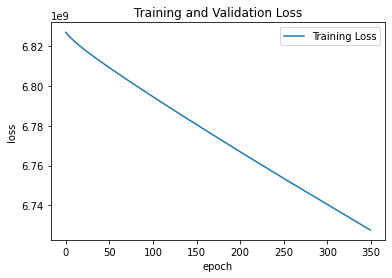

In [59]:
loss = history.history['loss']
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Predict

In [27]:
#load the model
model = tf.keras.models.load_model("my_model.h5")

In [127]:
page=df["Page"]

In [72]:
train.iloc[:,772:803]

,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,8.0,14.0,4.0,10.0,8.0,8.0,13.0,14.0,7.0,5.0,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,3.0,1.0,3.0,4.0,1.0,3.0,4.0,0.0,5.0,8.0,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [73]:
test_columns=train.iloc[:,772:803].columns

In [74]:
test_y=train.iloc[:,772:803]

In [75]:
train.iloc[:,708:772]

,2017-06-08,2017-06-09,2017-06-10,2017-06-11,2017-06-12,2017-06-13,2017-06-14,2017-06-15,2017-06-16,2017-06-17,...,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10
0,18.0,23.0,37.0,23.0,27.0,24.0,26.0,35.0,32.0,29.0,...,20.0,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0
1,19.0,20.0,30.0,34.0,14.0,22.0,26.0,18.0,21.0,25.0,...,18.0,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0
2,2.0,0.0,6.0,3.0,3.0,11.0,19.0,11.0,5.0,3.0,...,0.0,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0
3,17.0,5.0,15.0,10.0,12.0,16.0,17.0,8.0,10.0,18.0,...,14.0,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0
4,7.0,13.0,22.0,16.0,14.0,18.0,6.0,9.0,38.0,17.0,...,14.0,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,2.0,1.0,3.0,2.0,3.0,3.0,4.0,3.0,0.0,7.0,...,0.0,1.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0
145059,6.0,5.0,10.0,5.0,4.0,19.0,4.0,4.0,7.0,61.0,...,3.0,2.0,6.0,1.0,2.0,3.0,3.0,18.0,4.0,5.0
145060,33.0,38.0,11.0,65.0,13.0,8.0,7.0,33.0,9.0,59.0,...,47.0,6.0,11.0,9.0,10.0,11.0,13.0,7.0,8.0,13.0
145061,1.0,7.0,8.0,9.0,10.0,9.0,1.0,1.0,5.0,6.0,...,2.0,6.0,17.0,3.0,4.0,5.0,1.0,4.0,2.0,12.0


In [76]:
test_x=train.iloc[:,708:772].T.values

In [77]:
test_x.shape

(64, 145063)

In [78]:
test_x=test_x.reshape(1, 64, 145063)

In [79]:
predictions = model.predict(test_x)

In [80]:
predictions.shape

(1, 64, 145063)

In [81]:
predictions

array([[[19.986023 , 33.786293 ,  6.1210737, ..., 39.175102 ,
         13.484387 , 27.89628  ],
        [31.803999 , 37.37448  ,  3.1834614, ..., 34.868244 ,
         12.191683 , 25.01093  ],
        [29.992706 , 23.368584 ,  5.2852607, ..., 42.589523 ,
         11.856766 , 25.932024 ],
        ...,
        [28.257643 , 31.71063  ,  5.444289 , ..., 33.860878 ,
         12.540134 , 21.250624 ],
        [38.957455 , 29.957346 ,  4.072081 , ..., 41.886154 ,
         10.413189 , 23.107246 ],
        [35.253635 , 27.421833 ,  2.1442327, ..., 40.949036 ,
         11.369603 , 22.755295 ]]], dtype=float32)

In [82]:
predictions=predictions.reshape(64, 145063)

In [83]:
predictions=np.maximum(predictions,0)

In [139]:
predictions=pd.DataFrame(predictions)

In [85]:
predictions=pd.DataFrame(predictions).T

In [86]:
predictions=predictions.iloc[:,:31]

In [87]:
predictions.columns=test_columns

In [172]:
train.columns=pd.to_datetime(train.columns)

In [162]:
predictions.columns=pd.to_datetime(predictions.columns)

In [163]:
predictions

,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,19.986023,31.803999,29.992706,23.454090,25.410963,29.257816,30.077944,21.063173,23.876724,24.658363,...,27.962275,29.163296,16.948917,13.669726,21.640963,26.576283,11.024288,14.583576,21.758354,27.075865
1,33.786293,37.374481,23.368584,28.692446,27.741837,41.893532,30.357296,26.080614,31.463211,41.997112,...,34.314552,19.171497,29.598745,31.934439,35.350037,24.080137,22.412060,21.719822,33.757660,21.363947
2,6.121074,3.183461,5.285261,3.761632,6.403507,4.419055,4.460662,2.324580,5.693327,0.498251,...,0.387715,2.873963,1.449169,9.161148,0.000000,1.398385,2.632638,0.000000,0.188825,2.186610
3,14.118236,19.992540,20.274639,16.692455,14.465902,15.216489,22.785618,17.816818,16.536592,16.504416,...,14.575956,16.260586,18.115059,13.744980,13.664386,24.416666,16.222021,17.085855,14.497719,17.912827
4,22.389585,23.592278,19.429050,18.413502,25.361439,25.958975,20.368099,19.305809,26.267458,22.538301,...,22.465038,19.459320,19.086819,18.285416,20.899096,22.994007,18.972652,20.355339,22.212091,21.658907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,12.791126,10.337665,6.946368,9.912624,13.486059,14.339226,8.153240,10.194290,16.271545,13.287464,...,9.644858,7.430882,9.394468,8.172441,8.509239,7.369674,7.397062,9.624621,8.443832,6.998046
145059,16.193859,19.739304,14.235894,12.237784,17.009167,20.720955,15.542983,13.280979,16.515169,17.297733,...,22.136904,15.704376,13.994550,17.780649,21.647785,20.670170,14.240791,18.954784,21.784632,13.890427
145060,39.175102,34.868244,42.589523,41.431576,41.174423,39.497120,50.297012,43.928062,47.144169,45.543877,...,41.362343,45.270676,40.245415,43.263199,42.785107,47.599159,39.239037,39.461716,40.577419,44.744919
145061,13.484387,12.191683,11.856766,12.987603,14.688773,13.677840,12.051871,11.752567,13.379279,14.625369,...,12.101449,15.708219,18.489643,12.865296,14.468662,14.205786,12.221061,16.214798,12.774656,11.957233


In [164]:
test_y.columns=pd.to_datetime(test_y.columns)

In [165]:
test_y

,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,8.0,14.0,4.0,10.0,8.0,8.0,13.0,14.0,7.0,5.0,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,3.0,1.0,3.0,4.0,1.0,3.0,4.0,0.0,5.0,8.0,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


### test score ： 各個網頁的絕對值

In [166]:
#算預測test的score 各個網頁的絕對值總和
abs(predictions-test_y).sum().sum()

3667888908.0251975

In [167]:
#算預測test的score 各個網頁的絕對值平均
abs(predictions-test_y).sum(axis=1)

0         314.853620
1         370.433708
2         147.276480
3         296.230320
4         261.888842
             ...    
145058    182.280087
145059    388.074383
145060    951.580994
145061    282.798916
145062    661.506878
Length: 145063, dtype: float64

In [168]:
#算預測test的score 各個網頁的絕對值平均
abs(predictions-test_y).sum(axis=1).mean()

25284.799763035342

### 任意畫三個網頁的預測圖

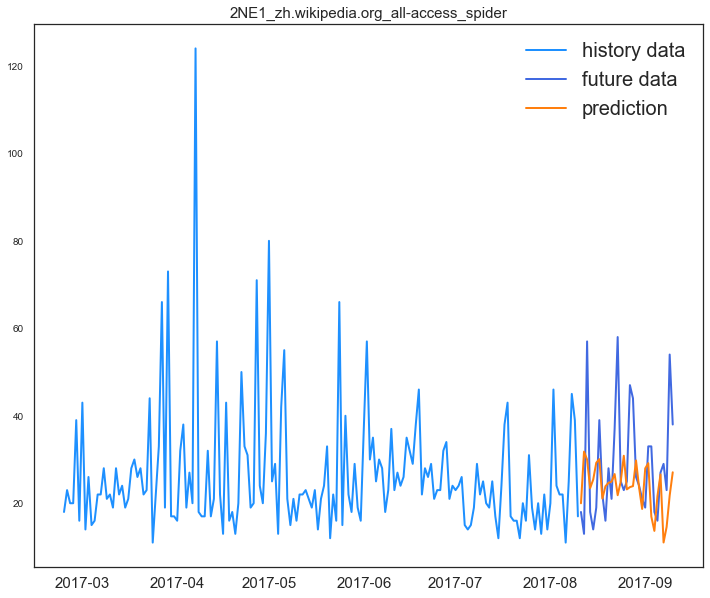

In [194]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(12, 10))
plt.plot(train.iloc[0,-200:-31],label="history data",c='dodgerblue')
plt.plot(train.iloc[0,-31:],label="future data",c="royalblue")
plt.plot(predictions.iloc[0],label="prediction",c="tab:orange")
plt.xticks(fontsize=15)
plt.title(page[0],fontsize=15)
plt.legend(fontsize=20,loc='upper right')
plt.show()

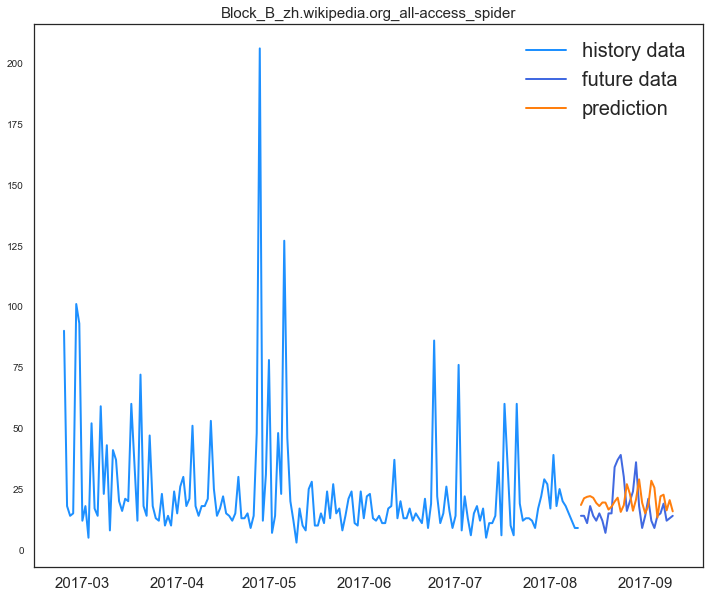

In [195]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(12, 10))
plt.plot(train.iloc[30,-200:-31],label="history data",c='dodgerblue')
plt.plot(train.iloc[30,-31:],label="future data",c="royalblue")
plt.plot(predictions.iloc[30],label="prediction",c="tab:orange")
plt.xticks(fontsize=15)
plt.title(page[30],fontsize=15)
plt.legend(fontsize=20,loc='upper right')
plt.show()

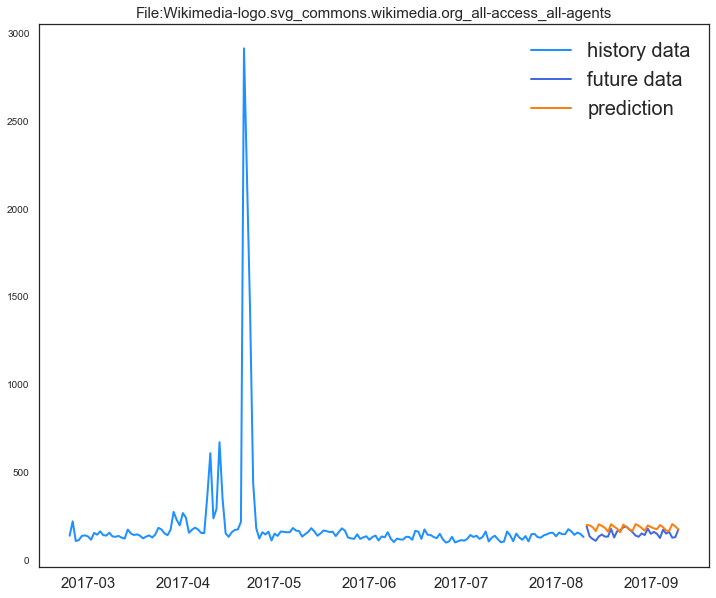

In [196]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(12, 10))
plt.plot(train.iloc[45000,-200:-31],label="history data",c='dodgerblue')
plt.plot(train.iloc[45000,-31:],label="future data",c="royalblue")
plt.plot(predictions.iloc[45000],label="prediction",c="tab:orange")
plt.title(page[45000])
plt.xticks(fontsize=15)
plt.title(page[45000],fontsize=15)
plt.legend(fontsize=20,loc='upper right')
plt.show()

### 將預測結果轉成可以繳交kaggle格式

In [60]:
train.iloc[:,739:803]

,2017-07-09,2017-07-10,2017-07-11,2017-07-12,2017-07-13,2017-07-14,2017-07-15,2017-07-16,2017-07-17,2017-07-18,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,22.0,25.0,20.0,19.0,25.0,17.0,12.0,24.0,38.0,43.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,76.0,24.0,15.0,12.0,16.0,15.0,34.0,16.0,16.0,19.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,2.0,6.0,5.0,1.0,7.0,2.0,1.0,2.0,3.0,1.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,6.0,18.0,12.0,16.0,20.0,10.0,14.0,11.0,19.0,8.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,16.0,15.0,9.0,12.0,11.0,16.0,14.0,11.0,4.0,6.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,1.0,1.0,5.0,0.0,5.0,2.0,1.0,1.0,0.0,4.0,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,7.0,5.0,7.0,7.0,3.0,1.0,5.0,3.0,2.0,2.0,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,10.0,22.0,15.0,11.0,77.0,35.0,27.0,16.0,9.0,7.0,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,7.0,5.0,2.0,2.0,3.0,6.0,5.0,6.0,0.0,4.0,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [61]:
test_x=train.iloc[:,739:803].T.values

In [63]:
test_x=test_x.reshape(1, 64 , 145063)

In [64]:
predictions = model.predict(test_x)

In [67]:
predictions=predictions.reshape( 64, 145063)

In [68]:
predictions=np.maximum(predictions,0)

In [70]:
output=pd.DataFrame(predictions).T

In [71]:
output

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,19.986023,31.803999,29.992706,23.454090,25.410963,29.257816,30.077944,21.063173,23.876724,24.658363,...,24.877485,32.902206,24.849892,26.193037,32.093208,27.125895,26.242958,28.257643,38.957455,35.253635
1,33.786293,37.374481,23.368584,28.692446,27.741837,41.893532,30.357296,26.080614,31.463211,41.997112,...,18.694555,27.742773,23.650089,36.646393,23.249779,21.884409,29.872618,31.710630,29.957346,27.421833
2,6.121074,3.183461,5.285261,3.761632,6.403507,4.419055,4.460662,2.324580,5.693327,0.498251,...,7.869421,4.775567,3.607483,5.102717,6.165019,5.394337,14.659824,5.444289,4.072081,2.144233
3,14.118236,19.992540,20.274639,16.692455,14.465902,15.216489,22.785618,17.816818,16.536592,16.504416,...,24.947735,18.688110,23.955919,17.893570,17.040035,20.613613,22.604986,22.750511,17.885191,22.269192
4,22.389585,23.592278,19.429050,18.413502,25.361439,25.958975,20.368099,19.305809,26.267458,22.538301,...,19.001644,24.719898,21.318634,20.530098,19.495636,24.039045,18.533127,23.405285,20.910151,31.757244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,12.791126,10.337665,6.946368,9.912624,13.486059,14.339226,8.153240,10.194290,16.271545,13.287464,...,10.379196,10.093019,13.394053,12.905277,11.452894,9.169942,10.818016,10.919720,8.901118,7.513136
145059,16.193859,19.739304,14.235894,12.237784,17.009167,20.720955,15.542983,13.280979,16.515169,17.297733,...,12.816669,10.995218,15.206130,18.112793,12.729111,13.497927,14.702058,19.128954,11.743771,13.030631
145060,39.175102,34.868244,42.589523,41.431576,41.174423,39.497120,50.297012,43.928062,47.144169,45.543877,...,41.854889,36.751450,34.478424,41.231079,40.383724,39.164307,37.159168,33.860878,41.886154,40.949036
145061,13.484387,12.191683,11.856766,12.987603,14.688773,13.677840,12.051871,11.752567,13.379279,14.625369,...,13.593747,12.081420,13.802611,15.399328,10.396585,10.153913,14.796222,12.540134,10.413189,11.369603


In [72]:
#output.to_csv("output.csv",index=None)

In [10]:
output=pd.read_csv("output.csv")

In [20]:
output=output.iloc[:,2:]

In [23]:
output2=pd.concat([df[["Page"]],output],axis=1)

In [160]:
key_re2=key["Page"].apply(lambda x : x.split("_")[:-1])

In [161]:
key_re2=key_re2.apply(lambda x : "_".join(x) )

In [162]:
key_re2

0          007_スペクター_ja.wikipedia.org_all-access_all-agents
1          007_スペクター_ja.wikipedia.org_all-access_all-agents
2          007_スペクター_ja.wikipedia.org_all-access_all-agents
3          007_スペクター_ja.wikipedia.org_all-access_all-agents
4          007_スペクター_ja.wikipedia.org_all-access_all-agents
                                 ...                       
8993901         龙生九子_zh.wikipedia.org_mobile-web_all-agents
8993902         龙生九子_zh.wikipedia.org_mobile-web_all-agents
8993903         龙生九子_zh.wikipedia.org_mobile-web_all-agents
8993904         龙生九子_zh.wikipedia.org_mobile-web_all-agents
8993905         龙生九子_zh.wikipedia.org_mobile-web_all-agents
Name: Page, Length: 8993906, dtype: object

In [166]:
key_re=key_re2.drop_duplicates()

In [167]:
key_re=pd.DataFrame(key_re)

In [168]:
key_re.columns=["Page"]

In [169]:
key_re

,Page
0,007_スペクター_ja.wikipedia.org_all-access_all-agents
62,007_スペクター_ja.wikipedia.org_all-access_spider
124,007_スペクター_ja.wikipedia.org_desktop_all-agents
125,007_スカイフォール_ja.wikipedia.org_desktop_all-agents
248,007_スペクター_ja.wikipedia.org_mobile-web_all-agents
...,...
8993596,龔嘉欣_zh.wikipedia.org_all-access_spider
8993658,龔嘉欣_zh.wikipedia.org_desktop_all-agents
8993720,龔嘉欣_zh.wikipedia.org_mobile-web_all-agents
8993782,龔照勝_zh.wikipedia.org_desktop_all-agents


In [170]:
output3=pd.merge(key_re,output2,on='Page',how='left')

In [181]:
output3=output3.drop("Page",axis=1)

In [183]:
output4=output3.values.flatten()

In [184]:
len(output4)

8993906

In [185]:
submission["Visits"]=output4

In [186]:
submission

,Id,Visits
0,0b293039387a,1497.26620
1,7114389dd824,1399.13400
2,057b02ff1f09,1711.42160
3,bd2aca21caa3,1610.39500
4,c0effb42cdd5,1477.94620
...,...,...
8993901,f78fbaa305ad,233.46062
8993902,33aecaf259d1,234.70734
8993903,a36228b64466,240.10733
8993904,26887d3e5c99,239.91876


In [187]:
#submission.to_csv("submission.csv",index=None)